## 패키지 Import

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 데이터 Load

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# normalization
x_train, x_test = x_train/255.0, x_test/255.0

In [4]:
# (60000, 28, 28) -> (60000, 28, 28, 1)로 reshape
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## 모델 구성

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, input_shape=(28,28,1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])
# unit은 없어도 괜찮고

## 모델 컴파일

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                    

## 모델 훈련(GPU 사용)

In [8]:
with(tf.device("device:GPU:0")):
    history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 15s 8ms/step - loss: 0.1743 - accuracy: 0.9479 - val_loss: 0.0414 - val_accuracy: 0.9877
Epoch 2/5
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0632 - accuracy: 0.9833 - val_loss: 0.0378 - val_accuracy: 0.9892
Epoch 3/5
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0494 - accuracy: 0.9865 - val_loss: 0.0355 - val_accuracy: 0.9907
Epoch 4/5
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0382 - accuracy: 0.9895 - val_loss: 0.0310 - val_accuracy: 0.9923
Epoch 5/5
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0333 - accuracy: 0.9908 - val_loss: 0.0342 - val_accuracy: 0.9923


## 훈련과정 확인

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


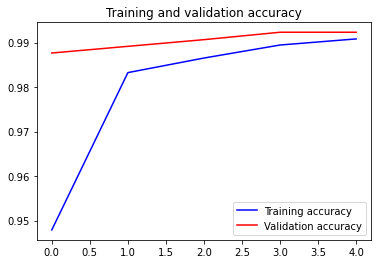

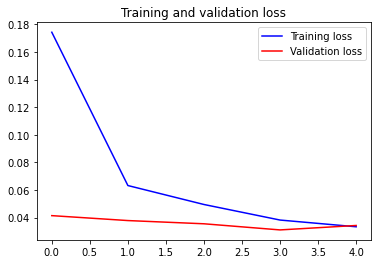

In [9]:

print(history.history.keys())
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(list(range(5)), train_accuracy, 'b', label='Training accuracy')
plt.plot(list(range(5)), val_accuracy, 'r', label='Validation accuracy')
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(list(range(5)), train_loss, 'b', label='Training loss')
plt.plot(list(range(5)), val_loss, 'r', label='Validation loss')
plt.title("Training and validation loss")
plt.legend()
plt.show()

## 테스트

In [10]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Accuracy: ", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0234 - accuracy: 0.9934
Accuracy:  0.993399977684021
